In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#this dataset is highly unbalanced

In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
#Under-Sampling

#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

#Number of Fraudulent Transactions --> 492

In [15]:
legit_sample = legit.sample(n=492)

In [ ]:
#Concatenating two DataFrames

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
231477,146779.0,-3.005142,3.245751,-1.628285,-1.090845,-0.108972,-1.185605,0.744452,0.136761,2.379494,...,-0.038671,1.137997,0.058913,1.070088,-0.263812,-0.299221,1.028083,0.270267,3.76,0
94024,64695.0,1.017088,-0.141324,0.975285,0.720051,-0.795380,-0.393572,-0.247842,-0.021148,0.200076,...,0.018075,-0.030848,0.086355,0.449691,0.049858,0.211652,0.002856,0.041330,79.50,0
72570,54763.0,1.224289,0.209635,0.043631,1.183135,-0.068475,-0.376964,0.106622,0.013104,0.029764,...,-0.023017,-0.001896,-0.181401,-0.012213,0.807334,-0.253007,-0.003796,-0.003136,1.00,0
147441,88556.0,2.097780,-0.997457,-0.529775,-0.448434,-0.972593,-0.106827,-1.046081,-0.021319,0.099081,...,-0.122689,0.248966,0.193858,0.613981,-0.305086,0.731341,-0.014383,-0.036606,30.53,0
23732,32888.0,0.352124,-1.700991,0.705071,0.506149,-1.165751,1.033541,-0.444529,0.419500,0.905610,...,0.095272,-0.311385,-0.194587,-0.212528,-0.193718,0.914561,-0.076275,0.062121,382.32,0


In [18]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96370.451220,0.056102,-0.105997,0.033102,-0.012938,-0.004347,-0.025887,0.046754,-0.063699,0.045200,...,-0.003535,0.037690,-0.023143,-0.013918,0.024274,0.012932,0.029738,-0.002246,-0.001864,103.371159
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#Splitting the data into Features & Targets

In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
231477  146779.0 -3.005142  3.245751 -1.628285 -1.090845 -0.108972 -1.185605   
94024    64695.0  1.017088 -0.141324  0.975285  0.720051 -0.795380 -0.393572   
72570    54763.0  1.224289  0.209635  0.043631  1.183135 -0.068475 -0.376964   
147441   88556.0  2.097780 -0.997457 -0.529775 -0.448434 -0.972593 -0.106827   
23732    32888.0  0.352124 -1.700991  0.705071  0.506149 -1.165751  1.033541   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [23]:
print(Y)

231477    0
94024     0
72570     0
147441    0
23732     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [26]:
#Splitting data intro train and test

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [29]:
#model training
#Logistic Regression

In [30]:
model = LogisticRegression()

In [31]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428208386277002


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046


Accuracy on Training data :  0.9428208386277002
Accuracy score on Test Data :  0.9238578680203046


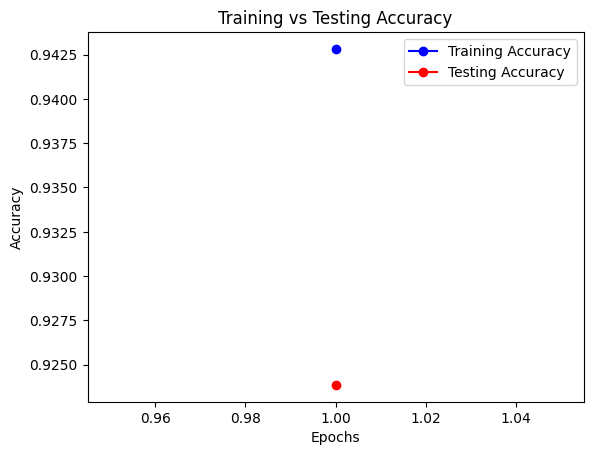

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming model is already defined and trained

# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on Test Data : ', test_data_accuracy)

# Plotting the accuracy data
epochs = [1]  # You can adjust the epoch values if you are tracking them across multiple epochs
train_accuracy = [training_data_accuracy]  # Store training accuracy
test_accuracy = [test_data_accuracy]  # Store test accuracy

plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, test_accuracy, label='Testing Accuracy', marker='o', color='red')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
#To track and plot the accuracy for each epoch during training, 
#we can store the accuracy values for each epoch and then plot them. 
#Here's how we can modify your code to track accuracy during multiple epochs, assuming we are training the model using Keras or TensorFlow:

C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 1: Training Accuracy = 0.5006, Test Accuracy = 0.4975
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 2: Training Accuracy = 0.5019, Test Accuracy = 0.4975
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 3: Training Accuracy = 0.5070, Test Accuracy = 0.4975
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 4: Training Accuracy = 0.5019, Test Accuracy = 0.4975
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 5: Training Accuracy = 0.6658, Test Accuracy = 0.6142
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 6: Training Accuracy = 0.5032, Test Accuracy = 0.4975
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 7: Training Accuracy = 0.5642, Test Accuracy = 0.5533
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

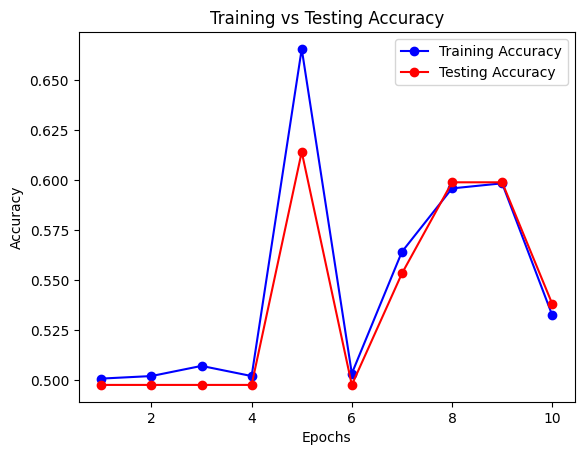

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample model setup (replace with your actual model)
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification, change as needed
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Lists to store accuracy at each epoch
train_accuracies = []
test_accuracies = []

# Training the model and storing accuracy values
for epoch in range(1, 11):  # Example: Train for 10 epochs
    # Fit the model for 1 epoch
    model.fit(X_train, Y_train, epochs=1, batch_size=32, verbose=0)
    
    # Get training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, (X_train_prediction > 0.5))  # Convert probabilities to binary predictions
    train_accuracies.append(train_accuracy)
    
    # Get test accuracy
    X_test_prediction = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, (X_test_prediction > 0.5))  # Convert probabilities to binary predictions
    test_accuracies.append(test_accuracy)
    
    # Print accuracy after each epoch (optional)
    print(f'Epoch {epoch}: Training Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}')

# Plotting the accuracy data
epochs = range(1, 11)  # Epochs range from 1 to 10

plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, test_accuracies, label='Testing Accuracy', marker='o', color='red')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()
